# Read Sage City Forum Data And Output Topics

## Requirements Setup

In [1]:
! pip install lxml
! pip install nltk
! pip install seaborn
! pip install textblob
! pip install bs4
! pip install xlrd
! pip install openpyxl 
! pip install --upgrade nbformat
! pip install gensim
! pip install langdetect
! pip install ipywidgets

import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# For graphing charts
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import plotly.express as px


import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

# Dataset to process
myFile = '../data/SageCityForumData.xlsx'
GraphTitle = 'Sage City Forum Sentiment'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Data Exploration and Cleaning

In [3]:
# Read yelp.csv into a DataFrame.
df_Forum = pd.read_excel(myFile, sheet_name='Forum List')
print(df_Forum.shape)
df_Forum.head(10)

(2943, 10)


,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
5,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
6,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
7,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
8,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
9,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN


# Clean the html

## Option 1

In [4]:
# def cleanhtml(raw_html):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr,'',raw_html)
#     return cleantext
# cleanhtml(df_Forum['Body'][0])

## Option 2: BeautifulSoup

In [5]:
def cleanhtml(raw_html):
    return BeautifulSoup(raw_html, "lxml").text

In [102]:
# Create a neutral, positive, negative column

df_Forum['Forum_Post_Raw'] = df_Forum.apply(lambda row: cleanhtml(row['Body']), axis=1)
df_Forum.head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes,Forum_Post_Raw
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...


In [103]:
df_distinct = df_Forum[['Forum ID', 'Forum Name', 'Subject', 'Post Date', 'User DisplayName', 'Forum_Post_Raw']].drop_duplicates(inplace=False).copy()
print('Distinct records: ', df_distinct.shape)
print('Original Dataset: ', df_Forum.shape)


Distinct records:  (1086, 6)
Original Dataset:  (2943, 11)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Sentiment Analysis 
Code to generate sentiment analysis

In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound= []
neg = []
neu = []
pos = []
for entry in df_distinct['Forum_Post_Raw']:
    sent = sia.polarity_scores(entry)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [105]:
df_distinct['compound'] = compound
df_distinct['neg'] = neg
df_distinct['neu'] = neu
df_distinct['pos'] = pos
df_distinct.head()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090


In [106]:
def getSentiment(compoundScore):
    retVal = "Neutral"
    if (compoundScore > 0.05):
        retVal = "Positive"
    elif (compoundScore <= - 0.05):
        retVal = "Negative"
    
    return retVal

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
# Create a neutral, positive, negative column

df_distinct['Sentiment'] = df_distinct.apply(lambda row: getSentiment(row['compound']), axis=1)
df_distinct.head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,Positive


In [108]:
# Make a day column in numeric format so we can use it for linear regression later
df_distinct['PostDate'] = pd.to_datetime(df_Forum['Post Date'])
df_distinct['DayName'] = df_distinct['PostDate'].dt.day_name()
df_distinct['DayOfMonth'] = df_distinct['PostDate'].dt.day
df_distinct.dtypes


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Forum ID                     int64
Forum Name                  object
Subject                     object
Post Date                   object
User DisplayName            object
Forum_Post_Raw              object
compound                   float64
neg                        float64
neu                        float64
pos                        float64
Sentiment                   object
PostDate            datetime64[ns]
DayName                     object
DayOfMonth                   int64
dtype: object

In [109]:
df_distinct.head(3)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,PostDate,DayName,DayOfMonth
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,2019-10-10 05:58:05.730,Thursday,10
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive,2019-10-10 12:44:35.957,Thursday,10
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive,2019-10-10 14:56:52.947,Thursday,10


## Train The Sentiment Analyzer

In [110]:
p = re.compile(" 00:00:00")
p.split('01/01/2021 12:12:10')

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['01/01/2021 12:12:10']

In [111]:
y = df_distinct['Sentiment']
X = df_distinct[['compound', 'neg', 'neu', 'pos']]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [113]:
rf.fit(X,y)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



RandomForestClassifier()

In [114]:
cross_val_score(rf, X, y)
# versus the baseline (63%), this is a little weak.

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([1.        , 1.        , 1.        , 0.99539171, 1.        ])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.30,
                                                        random_state=14)
rf.fit(X_train,y_train)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



RandomForestClassifier()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



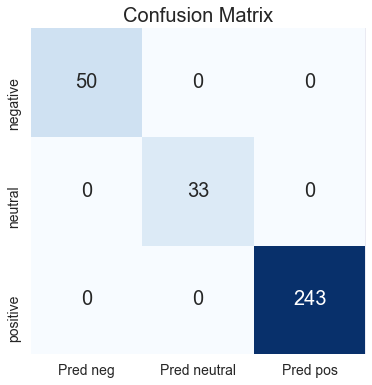

In [116]:

conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.savefig('ConfusionMatric.png')


In [203]:
# SAVE THIS MANUALLY TO A PICTURE
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        50
     Neutral       1.00      1.00      1.00        33
    Positive       1.00      1.00      1.00       243

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326
weighted avg       1.00      1.00      1.00       326



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [204]:
df_distinct.isnull().sum()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Forum ID            0
Forum Name          0
Subject             0
Post Date           0
User DisplayName    0
Forum_Post_Raw      0
compound            0
neg                 0
neu                 0
pos                 0
Sentiment           0
PostDate            0
DayName             0
DayOfMonth          0
dtype: int64

In [205]:
# df_distinct

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [206]:
df = df_distinct.copy()
df['ShortText'] = df['Forum_Post_Raw'].str[:50]
df.dtypes
dfLDA = df.copy()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [207]:
dfLDA['Forum_Post_Raw'].isnull().sum()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0

In [208]:
# dfLDA['Forum_Post_Raw'].dropna(inplace=True)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [209]:
df.set_index('PostDate', inplace=True)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [210]:
df.head(1)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,DayName,DayOfMonth,ShortText
PostDate,,,,,,,,,,,,,,
2019-10-10 05:58:05.730,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,Thursday,10,Company upgraded to windows 10. Used to run an...


In [211]:
df2 = df.sort_values(['PostDate']).copy()


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [212]:
fig = px.line(df2, x='Post Date', y='neg')
fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [213]:
fig = px.line(df2, x='Post Date', y='pos', color='Sentiment')
fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [214]:
# fig = go.figure(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )




# headerColor = 'grey'
# rowEvenColor = 'lightgrey'
# rowOddColor = 'white'
# alignment = ['left', 'left', 'left', 'center', 'center', 'center']

# fig = go.Figure(data=[go.Table(
#     columnwidth = [30,300,60,40,40],
#     header=dict(values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#                 fill_color=headerColor,
#                 align=alignment),
#     cells=dict(values=[df['PostDate'].dt.strftime("%m/%d/%y %H:%M:%S"), df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                fill_color = [[rowOddColor,rowEvenColor]*df.shape[0]],
#                align=alignment))
# ])

# fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [215]:
# headerColor = 'grey'
# rowEvenColor = 'lightgrey'
# rowOddColor = 'white'

# # for i, row in enumerate(df_Forum["Post Date"]):
# #     p = re.compile(" 00:00:00")
# #     datetime = p.split(df["Post Date"][i])[0]
# #     df.iloc[i, 1] = datetime

# fig = make_subplots(
#     rows=3, cols=1,
#     shared_xaxes=True,
#     vertical_spacing=0.03,
#     specs=[[{"type": "table"}],
#            [{"type": "scatter"}],
#            [{"type": "scatter"}]]
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["pos"],
#         mode="lines",
#         name="Positive Sentiment"
#     ),
#     row=3, col=1
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["neg"],
#         mode="lines",
#         name="Negative Sentiment"
#     ),
#     row=2, col=1
# )

# fig.add_trace(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )

# fig.write_html('Sentiment.html')
# fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [216]:
features = ['Forum_Post_Raw','neg','neu','pos']

# Top 5 Neutral Tweets
dfNeu = df[features].sort_values("neu", ascending=False).head(5)
dfNeu.name = "Neutral"

# Top 5 Negative Tweets
dfNeg = df[features].sort_values("neg", ascending=False).head(5)
dfNeg.name = "Negative"

# Top 5 Positive Tweets
dfPos = df[features].sort_values("pos", ascending=False).head(5)
dfPos.name = "Positive"
dataSets = [dfNeu,dfPos, dfNeg]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [217]:
df.describe()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,compound,neg,neu,pos,DayOfMonth
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,91.429098,0.358396,0.039499,0.853801,0.105767,15.840700
std,155.599403,0.520617,0.053476,0.091070,0.076172,8.454238
min,40.000000,-0.997200,0.000000,0.000000,0.000000,1.000000
25%,40.000000,0.000000,0.000000,0.802000,0.050000,9.000000
50%,40.000000,0.495150,0.018000,0.862500,0.098000,16.000000
75%,40.000000,0.805275,0.064000,0.916000,0.152000,23.000000
max,673.000000,0.989500,0.415000,1.000000,0.394000,31.000000


In [218]:
# Alternative way to make tables, doesn't work as well!
# import plotly.figure_factory as ff

# def WriteTable(dataSets):
#     for frame in dataSets:
#         fig =  ff.create_table(frame)
#         fig.write_html(frame.name+".html")
#         fig.show()

# WriteTable(dataSets)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [219]:

import plotly.graph_objects as go
import pandas as pd

def WriteMyTable(dataSets):
    for frame in dataSets:
        headerColor = 'grey'
        rowEvenColor = 'lightgrey'
        rowOddColor = 'white'

        fig = go.Figure(data=[go.Table(
            columnwidth = [300,40,40,40],
            header=dict(values=[x for x in features],
                        fill_color='#39416C',                
                        font=dict(color='white', size=12),
                        align=['left', 'center', 'center', 'center']),
            cells=dict(values=[frame.Forum_Post_Raw, frame.neg, frame.neu, frame.pos],
                    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
                    align=['left', 'center', 'center', 'center']))
        ])
        fig.update_layout(title=frame.name, width=1000, height=400)
        fig.write_html(frame.name+".html")
        fig.show()

WriteMyTable(dataSets)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Charting Ideas
1. Top pos / neg post by user
2. Trend line over time (SNS) color = user
- Does it match up to release dates or seasonal timings? 
- Was there a bad release?
- Was there a good release?
- Can we classify based on tags?

3. PCA analysis
4. Felix analysis (lda): https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
5. Prediction of nltk accuracy chart?

# Latent Dirichlet Allocation (LDA) Analysis

Three main parameters of the model
1. Number of topics
2. Number of words per topic
3. Number of topics per document

In [220]:
from gensim import corpora, models
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from gensim.models import Phrases
from gensim import corpora
from gensim import models
import numpy as np


import nltk
nltk.download('averaged_perceptron_tagger')
from itertools import chain # to flatten list of sentences of tokens into list of tokens



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-220-6223f08b0e3e>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



0it [00:00, ?it/s]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [221]:
# dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
# dictionary_LDA.filter_extremes(no_below=3)
# corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

# num_topics = 20
# %time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
#                                   id2word=dictionary_LDA, \
#                                   passes=4, alpha=[0.01]*num_topics, \
#                                   eta=[0.01]*len(dictionary_LDA.keys()))

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Tokenization

In [222]:
dfLDA.isna().sum()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Forum ID            0
Forum Name          0
Subject             0
Post Date           0
User DisplayName    0
Forum_Post_Raw      0
compound            0
neg                 0
neu                 0
pos                 0
Sentiment           0
PostDate            0
DayName             0
DayOfMonth          0
ShortText           0
dtype: int64

In [223]:
dfLDA['sentences'] = dfLDA.Forum_Post_Raw.progress_map(sent_tokenize)
dfLDA['sentences'].head(1).tolist()[0][:3]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

['Company upgraded to windows 10.',
 'Used to run an ERP program which no one heard about, made by U8Soft (keep in mind that the company is in China).',
 'They are now asking for an insanely high amount of money to get it to work on windows 10.']

In [224]:
dfLDA['token_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['token_sentences'].head(1).tolist()[0][:3])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


In [225]:
dfLDA['tokens_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['tokens_sentences'].head(1).tolist()[0][:3])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


## Lemmatize with POS tagging

In [226]:
dfLDA['POS_tokens'] = dfLDA['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(dfLDA['POS_tokens'].head(1).tolist()[0][:3])


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[[('Company', 'NN'), ('upgraded', 'VBD'), ('to', 'TO'), ('windows', 'VB'), ('10', 'CD'), ('.', '.')], [('Used', 'VBN'), ('to', 'TO'), ('run', 'VB'), ('an', 'DT'), ('ERP', 'NNP'), ('program', 'NN'), ('which', 'WDT'), ('no', 'DT'), ('one', 'NN'), ('heard', 'NN'), ('about', 'IN'), (',', ','), ('made', 'VBN'), ('by', 'IN'), ('U8Soft', 'NNP'), ('(', '('), ('keep', 'VB'), ('in', 'IN'), ('mind', 'NN'), ('that', 'IN'), ('the', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('in', 'IN'), ('China', 'NNP'), (')', ')'), ('.', '.')], [('They', 'PRP'), ('are', 'VBP'), ('now', 'RB'), ('asking', 'VBG'), ('for', 'IN'), ('an', 'DT'), ('insanely', 'RB'), ('high', 'JJ'), ('amount', 'NN'), ('of', 'IN'), ('money', 'NN'), ('to', 'TO'), ('get', 'VB'), ('it', 'PRP'), ('to', 'TO'), ('work', 'VB'), ('on', 'IN'), ('windows', 'NNS'), ('10', 'CD'), ('.', '.')]]


In [227]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [228]:
# Lemmatizing each word with its POS tag, in each sentence
dfLDA['tokens_sentences_lemmatized'] = dfLDA['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

In [229]:
dfLDA['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['Company', 'upgrade', 'to', 'windows', '10', '.'],
 ['Used',
  'to',
  'run',
  'an',
  'ERP',
  'program',
  'which',
  'no',
  'one',
  'heard',
  'about',
  ',',
  'make',
  'by',
  'U8Soft',
  '(',
  'keep',
  'in',
  'mind',
  'that',
  'the',
  'company',
  'be',
  'in',
  'China',
  ')',
  '.'],
 ['They',
  'be',
  'now',
  'ask',
  'for',
  'an',
  'insanely',
  'high',
  'amount',
  'of',
  'money',
  'to',
  'get',
  'it',
  'to',
  'work',
  'on',
  'window',
  '10',
  '.']]

## Regrouping tokens and removing stop words

In [230]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
stopwords_nonsense = ['hello', 'thanks', 'le', 'la', 'hi', 'try', 'sage', 'however', 'way']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other + stopwords_nonsense


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [231]:
dfLDA['tokens'] = dfLDA['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
dfLDA['tokens'] = dfLDA['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [232]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [233]:
dfLDA['tokens'].head(1).tolist()[0][:30]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['company',
 'upgrade',
 'windows',
 'used',
 'run',
 'erp',
 'program',
 'heard',
 'keep',
 'mind',
 'company',
 'china',
 'ask',
 'insanely',
 'high',
 'amount',
 'money',
 'work',
 'window',
 'instal',
 'window',
 'ca',
 'select',
 'server',
 'drop',
 'menu',
 'almost',
 'network',
 'list',
 'except']

## Data Preparation

In [234]:
tokens = dfLDA['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [235]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [236]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [237]:
np.random.seed(123456)
num_topics = 3

%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=10, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Wall time: 5.86 s


In [238]:
lda_model.save('myLdaModel.model')

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [239]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.016*"create" + 0.013*"invoice" + 0.012*"line" + 0.011*"file" + 0.010*"import" + 0.009*"error" + 0.008*"customer" + 0.008*"folder" + 0.007*"work" + 0.007*"product" + 0.007*"anyone" + 0.007*"order" + 0.007*"sale_order" + 0.006*"find" + 0.006*"check" + 0.006*"set" + 0.005*"run" + 0.005*"call" + 0.005*"system" + 0.005*"help"

1: 0.017*"error" + 0.015*"user" + 0.010*"create" + 0.008*"table" + 0.007*"issue" + 0.007*"work" + 0.007*"server" + 0.006*"find" + 0.006*"update" + 0.005*"set" + 0.005*"record" + 0.005*"different" + 0.005*"change" + 0.005*"problem" + 0.005*"data" + 0.005*"version" + 0.005*"patch" + 0.005*"process" + 0.004*"please" + 0.004*"report"

2: 0.017*"field" + 0.015*"create" + 0.013*"product" + 0.012*"change" + 0.010*"screen" + 0.009*"customer" + 0.009*"value" + 0.009*"run" + 0.009*"table" + 0.008*"user" + 0.008*"function" + 0.007*"set" + 0.007*"report" + 0.006*"add" + 0.006*"new" + 0.006*"error" + 0.006*"code" + 0.006*"stock" + 0.006*"data" + 0.006*"possible"



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [240]:
# for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
#     print(str(i)+": "+ topic)
#     print()

model_topic_words =[]
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    t_words =[]
    ts =topic.split("+")
    for t in range(0, len(ts)):
        # print(ts[t].split('*'))
        t_words.append(ts[t].split('*')[1])

    model_topic_words.append(t_words)

model_topic_words[:2]



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['"create" ',
  '"invoice" ',
  '"line" ',
  '"file" ',
  '"import" ',
  '"error" ',
  '"customer" ',
  '"folder" ',
  '"work" ',
  '"product" ',
  '"anyone" ',
  '"order" ',
  '"sale_order" ',
  '"find" ',
  '"check" ',
  '"set" ',
  '"run" ',
  '"call" ',
  '"system" ',
  '"help"'],
 ['"error" ',
  '"user" ',
  '"create" ',
  '"table" ',
  '"issue" ',
  '"work" ',
  '"server" ',
  '"find" ',
  '"update" ',
  '"set" ',
  '"record" ',
  '"different" ',
  '"change" ',
  '"problem" ',
  '"data" ',
  '"version" ',
  '"patch" ',
  '"process" ',
  '"please" ',
  '"report"']]

In [241]:
## Allocation topics to documents
dfLDA.head(1)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."


In [242]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [243]:
lda_model[corpus[0]]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(1, 0.9994448)]

## Predict based on input

# Advanced exploration of LDA result
## Allocation of topics in all documents

In [244]:
topics = [lda_model[corpus[i]] for i in range(len(dfLDA))]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [245]:

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [246]:
topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038537,NaN,NaN,NaN,NaN,NaN,0.091301,NaN,NaN,0.869287,NaN


In [247]:

# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [248]:
# Which document are about topic 14
# document_topic.sort_values(num_topics-1, ascending=False)[num_topics-1].head(10)
document_topic

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2
0,0.000000,0.999445,0.000000
1,0.000000,0.796473,0.203224
2,0.998949,0.000000,0.000000
3,0.998949,0.000000,0.000000
4,0.000000,0.150335,0.849211
...,...,...,...
1081,0.000000,0.000000,0.999131
1082,0.998186,0.000000,0.000000
1083,0.996023,0.000000,0.000000
1084,0.333333,0.333333,0.333333


In [249]:
dfLDA.head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,...,2019-10-10 12:44:35.957,Thursday,10,Hello!\n\nI see that Sage V11 patch 14 was com...,"[Hello!, I see that Sage V11 patch 14 was comp...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde..."
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 14:56:52.947,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t..."
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 20:56:53.483,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t..."
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,...,2019-10-11 13:10:28.983,Friday,11,I am trying to remove some of the columns on t...,[I am trying to remove some of the columns on ...,"[[I, am, trying, to, remove, some, of, the, co...","[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro..."


In [250]:
print(dfLDA.Forum_Post_Raw.loc[31][:100])

Hello!

I see that Sage V11 patch 14 was completed on October 1st. at least in the patch finder. It 


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:>

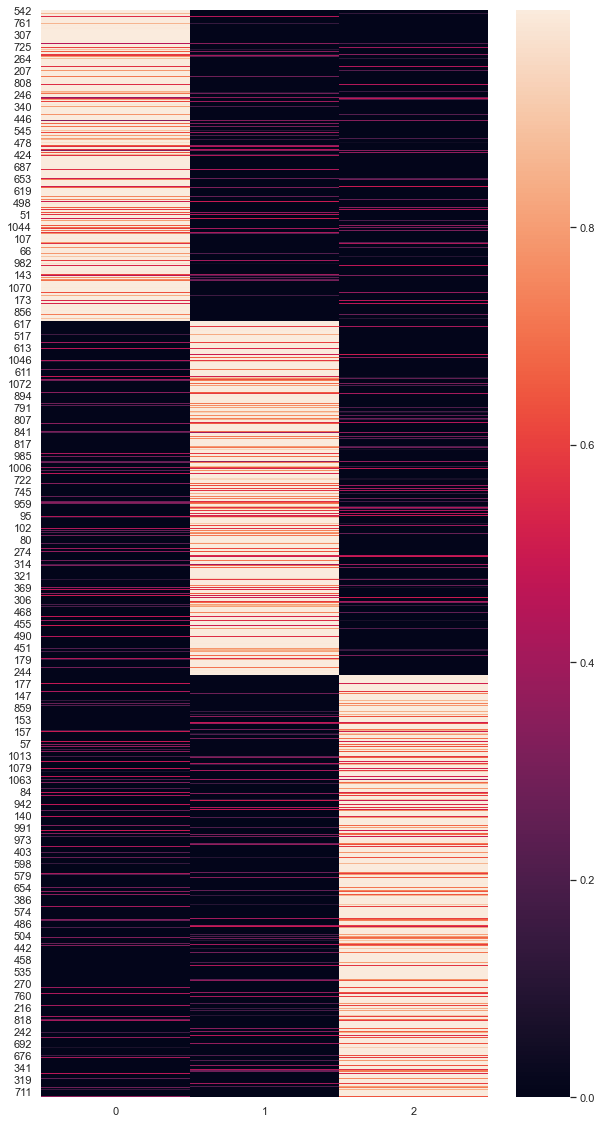

In [251]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:>

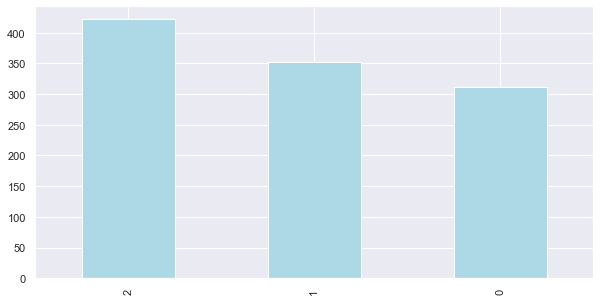

In [252]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

# Visualize the data

In [253]:
! pip install pyLDAvis

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [254]:
# import scipy
# scipy.test()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [255]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [256]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a    parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)


%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.save_html(vis, 'myBook.html')
pyLDAvis.display(vis)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [257]:
dfLDA.head()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,...,2019-10-10 12:44:35.957,Thursday,10,Hello!\n\nI see that Sage V11 patch 14 was com...,"[Hello!, I see that Sage V11 patch 14 was comp...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde..."
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 14:56:52.947,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t..."
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 20:56:53.483,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t..."
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,...,2019-10-11 13:10:28.983,Friday,11,I am trying to remove some of the columns on t...,[I am trying to remove some of the columns on ...,"[[I, am, trying, to, remove, some, of, the, co...","[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro..."


In [258]:
print(dfLDA.shape)
print(len(document_topic))

(1086, 21)
1086


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [259]:
dfBob = dfLDA.copy()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [271]:
dfBob = dfBob.reset_index()
dfBob

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,0,0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."
1,1,31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,...,2019-10-10 12:44:35.957,Thursday,10,Hello!\n\nI see that Sage V11 patch 14 was com...,"[Hello!, I see that Sage V11 patch 14 was comp...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde..."
2,2,62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,...,2019-10-10 14:56:52.947,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t..."
3,3,63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,...,2019-10-10 20:56:53.483,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t..."
4,4,64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,...,2019-10-11 13:10:28.983,Friday,11,I am trying to remove some of the columns on t...,[I am trying to remove some of the columns on ...,"[[I, am, trying, to, remove, some, of, the, co...","[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1081,2938,332,Sage Data &amp; Analytics,dimension type setting,2020-04-29T11:08:12.53,Afrosage,\nThe above pic is carry forward selection ch...,0.5770,0.035,...,2020-04-29 11:08:12.530,Wednesday,29,\nThe above pic is carry forward selection ch...,[\nThe above pic is carry forward selection c...,"[[The, above, pic, is, carry, forward, selecti...","[[The, above, pic, is, carry, forward, selecti...","[[(The, DT), (above, JJ), (pic, NN), (is, VBZ)...","[[The, above, pic, be, carry, forward, selecti...","[pic, carry, forward, selection, check, unchec..."
1082,1082,2939,332,Sage Data &amp; Analytics,PORDERQ - RETRCPDAT field ?,2020-04-23T11:51:48.66,Nicolasson,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.9136,0.000,...,2020-04-23 11:51:48.660,Thursday,23,"Hello 

In [272]:
document_topic

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2
0,0.000000,0.999445,0.000000
1,0.000000,0.796473,0.203224
2,0.998949,0.000000,0.000000
3,0.998949,0.000000,0.000000
4,0.000000,0.150335,0.849211
...,...,...,...
1081,0.000000,0.000000,0.999131
1082,0.998186,0.000000,0.000000
1083,0.996023,0.000000,0.000000
1084,0.333333,0.333333,0.333333


In [353]:
dfLDA = dfBob.copy()
print(dfLDA.shape)

(1086, 23)


In [357]:
for i in range(0,3):
    dfLDA['topic'+ str(i)]=None
    dfLDA['topic'+str(i)+'_pct']=None

for r in range(0,len(document_topic)):
    ts = document_topic.loc[r].sort_values(ascending=False)[:3]
#     print(ts)
    topic_nums = list(ts.index)
    print(topic_nums)
    topic_pcts = list(ts)
#     print(topic_pcts)
    for i in range(0,3):
        dfLDA.at[r,'topic'+ str(i)]=topic_nums[i]
        dfLDA.at[r,'topic'+ str(i)+'_pct']=topic_pcts[i]

dfLDA.head(5)

[1, 0, 2]
[1, 2, 0]
[0, 1, 2]
[0, 1, 2]
[2, 1, 0]
[0, 1, 2]
[0, 1, 2]
[0, 2, 1]
[2, 0, 1]
[2, 0, 1]
[0, 1, 2]
[1, 0, 2]
[0, 2, 1]
[2, 1, 0]
[0, 1, 2]
[0, 1, 2]
[1, 0, 2]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[0, 1, 2]
[2, 0, 1]
[0, 1, 2]
[0, 2, 1]
[0, 1, 2]
[2, 0, 1]
[0, 1, 2]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[1, 0, 2]
[2, 1, 0]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[1, 0, 2]
[2, 1, 0]
[1, 0, 2]
[2, 0, 1]
[0, 2, 1]
[1, 0, 2]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[2, 0, 1]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[2, 0, 1]
[0, 1, 2]
[2, 0, 1]
[0, 1, 2]
[1, 0, 2]
[1, 0, 2]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[1, 0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[2, 1, 0]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[1, 0, 2]
[0, 1, 2]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[2, 0, 1]
[1, 2, 0]
[1, 0, 2]
[0, 1, 2]
[1, 0, 2]
[2, 1, 0]


[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[2, 1, 0]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[2, 1, 0]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[0, 1, 2]
[2, 0, 1]
[2, 0, 1]
[0, 1, 2]
[2, 0, 1]
[0, 1, 2]
[2, 0, 1]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[0, 1, 2]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[0, 1, 2]
[1, 2, 0]
[0, 1, 2]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[0, 2, 1]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[1, 0, 2]
[2, 1, 0]
[2, 0, 1]
[2, 1, 0]
[2, 0, 1]
[2, 0, 1]
[2, 0, 1]
[0, 2, 1]
[2, 0, 1]
[1, 2, 0]
[2, 0, 1]
[2, 0, 1]
[0, 1, 2]
[2, 1, 0]
[0, 1, 2]
[0, 1, 2]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 0, 1]
[1, 2, 0]
[2, 1, 0]
[2, 1, 0]
[2, 0, 1]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[1, 2, 0]
[2, 0, 1]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[2, 1, 0]
[1, 0, 2]
[2, 0, 1]
[1, 0, 2]
[2, 0, 1]
[0, 1, 2]
[0, 1, 2]
[0, 2, 1]
[1, 0, 2]
[1, 0, 2]
[2, 0, 1]
[0, 1, 2]
[2, 0, 1]
[1, 0, 2]
[2, 1, 0]
[1, 2, 0]
[2, 0, 1]


,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
0,0,0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,...,"[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr...",1,0.999445,0,0.0,2,0.0
1,1,31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,...,"[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde...",1,0.796473,2,0.203224,0,0.0
2,2,62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t...",0,0.998949,1,0.0,2,0.0
3,3,63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t...",0,0.998949,1,0.0,2,0.0
4,4,64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,...,"[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro...",2,0.849211,1,0.150335,0,0.0


In [358]:
dfLDA.columns

Index(['level_0', 'index', 'Forum ID', 'Forum Name', 'Subject', 'Post Date',
       'User DisplayName', 'Forum_Post_Raw', 'compound', 'neg', 'neu', 'pos',
       'Sentiment', 'PostDate', 'DayName', 'DayOfMonth', 'ShortText',
       'sentences', 'token_sentences', 'tokens_sentences', 'POS_tokens',
       'tokens_sentences_lemmatized', 'tokens', 'topic0', 'topic0_pct',
       'topic1', 'topic1_pct', 'topic2', 'topic2_pct'],
      dtype='object')

In [359]:
dfLDA.tail()


,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
1081,1081,2938,332,Sage Data &amp; Analytics,dimension type setting,2020-04-29T11:08:12.53,Afrosage,\nThe above pic is carry forward selection ch...,0.5770,0.035,...,"[[The, above, pic, is, carry, forward, selecti...","[[(The, DT), (above, JJ), (pic, NN), (is, VBZ)...","[[The, above, pic, be, carry, forward, selecti...","[pic, carry, forward, selection, check, unchec...",2,0.999131,0,0.0,1,0.0
1082,1082,2939,332,Sage Data &amp; Analytics,PORDERQ - RETRCPDAT field ?,2020-04-23T11:51:48.66,Nicolasson,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.9136,0.000,...,"[[Hello, guys, ,, I, hope, you, are, well, .],...","[[(Hello, NNP), (guys, NNS), (,, ,), (I, PRP),...","[[Hello, guy, ,, I, hope, you, be, well, .], [...","[guy, hope, well, research, surprisingly, find...",0,0.998186,1,0.0,2,0.0
1083,1083,2940,332,Sage Data &amp; Analytics,Supplier Invoice/Memo Import,2020-04-23T19:33:37.777,Warren Guan,It says all the lines are converted but it did...,0.4497,0.000,...,"[[It, says, all, the, lines, are, converted, b...","[[(It, PRP), (says, VBZ), (all, PDT), (the, DT...","[[It, say, all, the, line, be, convert, but, i...","[line, convert, generate, dat, file, idea, ple...",0,0.996023,1,0.0,2,0.0
1084,1084,2941,332,Sage Data &amp; Analytics,year closing,2020-01-20T07:01:58.37,info@epochholland.nl,,0.0000,0.000,...,[],[],[],[],0,0.333333,1,0.333333,2,0.333333
1085,1085,2942,332,Sage Data &amp; Analytics,add CPTANALIN table to requester,2019-10-10T15:41:06.877,Christine T.,requester links aren't my strong suit- I can h...,0.7905,0.041,...,"[[requester, links, are, n't, my, strong, suit...","[[(requester, NN), (links, NNS), (are, VBP), (...","[[requester, link, be, n't, my, strong, suit-,...","[requester, link, strong, handle, crystal, rep...",2,0.640902,0,0.358191,1,0.0


In [360]:
dfLDA.shape

(1086, 29)

In [362]:
dfLDA[dfLDA['topic0']==2].columns

Index(['level_0', 'index', 'Forum ID', 'Forum Name', 'Subject', 'Post Date',
       'User DisplayName', 'Forum_Post_Raw', 'compound', 'neg', 'neu', 'pos',
       'Sentiment', 'PostDate', 'DayName', 'DayOfMonth', 'ShortText',
       'sentences', 'token_sentences', 'tokens_sentences', 'POS_tokens',
       'tokens_sentences_lemmatized', 'tokens', 'topic0', 'topic0_pct',
       'topic1', 'topic1_pct', 'topic2', 'topic2_pct'],
      dtype='object')

In [364]:
dfLDA[dfLDA['topic0']==0].Forum_Post_Raw.apply(lambda t: print(t, '\n\n'))

To access this download, log into https://support.na.sage.com/ and in the search field type 101208. Click Search.

For a complete list of available Sage X3 full-product downloads and patch updates, see the Sage X3 Download Portal. To access the Sage X3 Download Portal, go to https://support.na.sage.com/, enter your Log on credentials (in upper right corner), and type 23522 in the Search field. Click Search. 
Important: If you use third-party products that integrate with Sage X3 or ISVs, check with the vendor of your third-party product to ensure their product is fully compatible with this release. If you integrate with other Sage products, check with your business partner or Sage to ensure that these components are compatible. 
It is highly recommended that you work with a certified partner or Sage Professional Services to install this patch.  
Need more help? Visit ourâ€¯Sage City Customer Resourcesâ€¯page for additional resources, including links to support options like Online Case s

2       None
3       None
5       None
6       None
7       None
        ... 
1055    None
1070    None
1082    None
1083    None
1084    None
Name: Forum_Post_Raw, Length: 311, dtype: object

In [370]:
dfResults = dfLDA[['Forum Name','Forum_Post_Raw', 'topic0_pct', 'topic1_pct', 'topic2_pct']].copy()
# dfResults = dfResults[dfResults['Forum_Post_Raw'].notna()]
# dfResults = dfResults[dfResults['topic0'].notna()]
dfResults

,Forum Name,Forum_Post_Raw,topic0_pct,topic1_pct,topic2_pct
0,Sage X3 General Discussion,Company upgraded to windows 10. Used to run an...,0.999445,0.0,0.0
1,Sage X3 General Discussion,Hello!\n\nI see that Sage V11 patch 14 was com...,0.796473,0.203224,0.0
2,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998949,0.0,0.0
3,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998949,0.0,0.0
4,Sage X3 General Discussion,I am trying to remove some of the columns on t...,0.849211,0.150335,0.0
...,...,...,...,...,...
1081,Sage Data &amp; Analytics,\nThe above pic is carry forward selection ch...,0.999131,0.0,0.0
1082,Sage Data &amp; Analytics,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.998186,0.0,0.0
1083,Sage Data &amp; Analytics,It says all the lines are converted but it did...,0.996023,0.0,0.0
1084,Sage Data &amp; Analytics,,0.333333,0.333333,0.333333


In [371]:
dfLDA[dfLDA['topic0']==0]

,level_0,index,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,...,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct
2,2,62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.0,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t...",0,0.998949,1,0.0,2,0.0
3,3,63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.0,...,"[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, download, log, http, search, field, t...",0,0.998949,1,0.0,2,0.0
5,5,95,40,Sage X3 General Discussion,Deliveries,2019-10-11T14:24:15.807,Juan Pablo G,"Just to confirm, is not possible to change the...",0.0000,0.0,...,"[[Just, to, confirm, ,, is, not, possible, to,...","[[(Just, RB), (to, TO), (confirm, VB), (,, ,),...","[[Just, to, confirm, ,, be, not, possible, to,...","[confirm, possible, change, uom, delivery, right]",0,0.995035,1,0.0,2,0.0
6,6,126,40,Sage X3 General Discussion,V12 Data Model,2019-10-11T16:02:41.787,Juan Pablo G,Is the online help data model correct for V12?...,0.4019,0.0,...,"[[Is, the, online, help, data, model, correct,...","[[(Is, VBZ), (the, DT), (online, NN), (help, N...","[[Is, the, online, help, data, model, correct,...","[online, help, data, model, correct, file, show]",0,0.996023,1,0.0,2,0.0
7,7,157,40,Sage X3 General Discussion,Entering a manual check that is already in g/l,2019-10-13T20:01:08.897,JeffW-SageX3,"Hi,\nI am fairly new to X3 and I entered g/l d...",0.6124,0.0,...,"[[Hi, ,, I, am, fairly, new, to, X3, and, I, e...","[[(Hi, NNP), (,, ,), (I, PRP), (am, VBP), (fai...","[[Hi, ,, I, be, fairly, new, to, X3, and, I, e...","[fairly, new, enter, data, payroll, already, e...",0,0.633222,2,0.365533,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1055,2858,294,Sage Enterprise Intelligence for Sage X3,Error while trying to create a New environment,2020-07-16T07:33:35.41,MC_SEI,\n\nI installed SEI version8.2.6.2 and was try...,0.2204,0.1,...,"[[I, installed, SEI, version8.2.6.2, and, was,...","[[(I, PRP), (installed, VBD), (SEI, NNP), (ver...","[[I, instal, SEI, version8.2.6.2, and, be, try...","[instal, sei, configure, script, button, click...",0,0.997155,1,0.0,2,0.0
1070,1070,2873,294,Sage Enterprise Intelligence for Sage X3,SVG locked when arrived table AUDITL,2019-11-13T09:35:33.91,MarioSage,"Hello, I run SVG all nigths at 21.00. When the...",0.5399,0.0,...,"[[Hello, ,, I, run, SVG, all, nigths, at, 21.0...","[[(Hello, NNP), (,, ,), (I, PRP), (run, VBP), ...","[[Hello, ,, I, run, SVG, all, nigths, at, 21.0...","[run, svg, nigths, proccess, dossvg, arrive, a...",0,0.997155,1,0.0,2,0.0
1082,1082,2939,332,Sage Data &amp; Analytics,PORDERQ - RETRCPDAT field ?,2020-04-23T11:51:48.66,Nicolasson,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.9136,0.0,...,"[[Hello, guys, ,, I, hope, you, are, well, .],...","[[(Hello, NNP), (guys, NNS), (,, ,), (I, PRP),...","[[Hello, guy, ,, I, hope, you, be, well, .], [...","[guy, hope, well, research, surprisingly, find...",0,0.998186,1,0.0,2,0.0
1083,1083,2940,332,Sage Data &amp; Analytics,Supplier Invoice/Memo Import,2020-04-23T19:33:37.777,Warren Guan,It says all the lines are converted but it did...,0.4497,0.0,...,"[[It, says, all, the, lines, are, converted, b...","[[(It, PRP), (says, VBZ), (all, PDT), (the, DT...","[[It, say, all, the, line, be, convert, but, i...","[line, convert, generate, dat, f

In [372]:
# frame.Forum_Post_Raw, frame.neg, frame.neu, frame.pos
dfResults.to_html(open('results.html', 'w'))


In [373]:
dfResults

,Forum Name,Forum_Post_Raw,topic0_pct,topic1_pct,topic2_pct
0,Sage X3 General Discussion,Company upgraded to windows 10. Used to run an...,0.999445,0.0,0.0
1,Sage X3 General Discussion,Hello!\n\nI see that Sage V11 patch 14 was com...,0.796473,0.203224,0.0
2,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998949,0.0,0.0
3,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",0.998949,0.0,0.0
4,Sage X3 General Discussion,I am trying to remove some of the columns on t...,0.849211,0.150335,0.0
...,...,...,...,...,...
1081,Sage Data &amp; Analytics,\nThe above pic is carry forward selection ch...,0.999131,0.0,0.0
1082,Sage Data &amp; Analytics,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.998186,0.0,0.0
1083,Sage Data &amp; Analytics,It says all the lines are converted but it did...,0.996023,0.0,0.0
1084,Sage Data &amp; Analytics,,0.333333,0.333333,0.333333
